# House Price Prediction Model

In [2]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Loading Dataset

In [3]:
df=pd.read_csv(r"D:\documents\Data Analysis With Python\Machine Learning\ML_Project\archive (2)\Housing.csv")

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Exploratory Data Analysis (EDA)

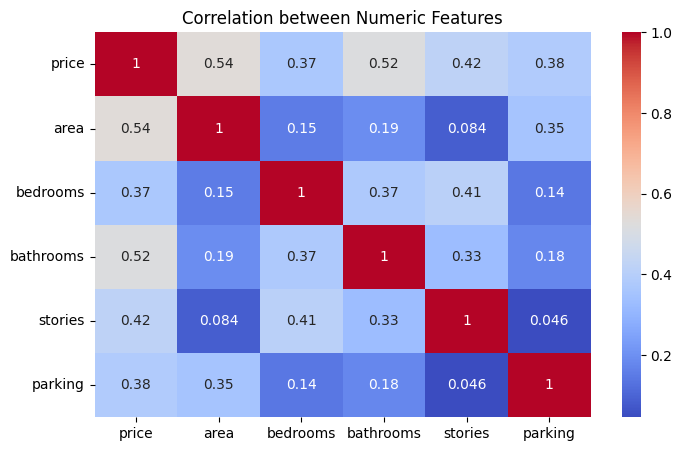

In [11]:
plt.figure(figsize=(8,5))

# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Numeric Features")
plt.show()

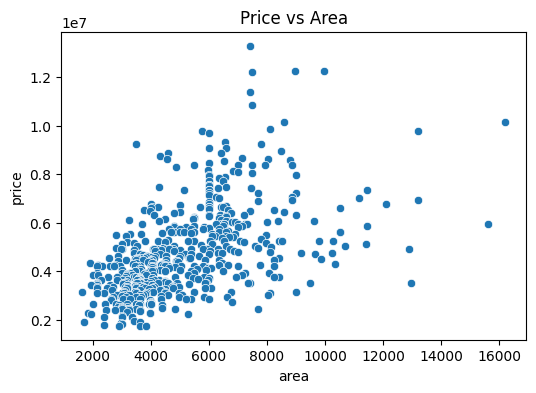

In [12]:
# Price vs Area
plt.figure(figsize=(6,4))
sns.scatterplot(x='area', y='price', data=df)
plt.title("Price vs Area")
plt.show()

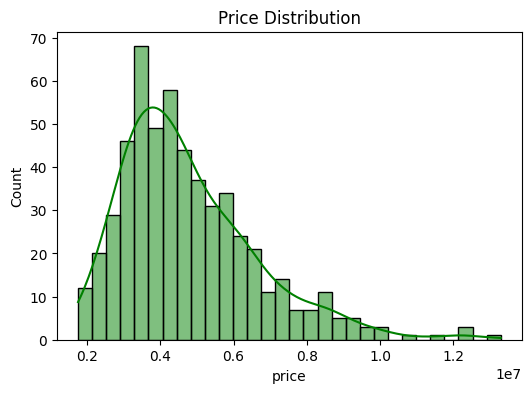

In [13]:
# Price distribution
plt.figure(figsize=(6,4))
sns.histplot(df['price'], bins=30, kde=True, color='green')
plt.title("Price Distribution")
plt.show()

# Data Preprocessing

In [14]:
# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)


In [15]:
# Features and target variable
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [16]:
# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (436, 13)
Testing Data Shape: (109, 13)


# Train the Linear Regression Model

In [17]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


In [18]:
# Predictions
y_pred = model.predict(X_test)


# Evaluate Model Performance

In [19]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 970043.40
Root Mean Squared Error (RMSE): 1324506.96
R² Score: 0.65


# Visualize Actual vs Predicted Prices

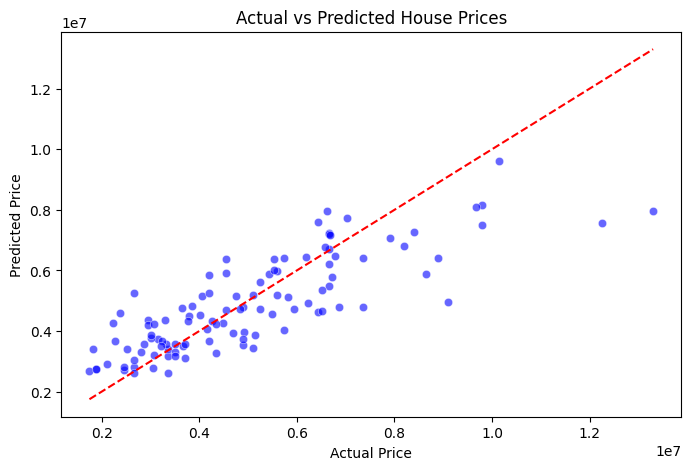

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

# Save Model for Future Use

In [21]:
import joblib
joblib.dump(model, "house_price_prediction_model.pkl")
print("✅ Model saved as house_price_prediction_model.pkl")

✅ Model saved as house_price_prediction_model.pkl


# Predict a New Example

In [22]:
# Example custom input (adjust values as per dataset)
sample = pd.DataFrame({
    'area': [5000],
    'bedrooms': [3],
    'bathrooms': [2],
    'stories': [2],
    'parking': [1],
    'mainroad_yes': [1],
    'guestroom_yes': [0],
    'basement_yes': [1],
    'hotwaterheating_yes': [0],
    'airconditioning_yes': [1],
    'prefarea_yes': [1],
    'furnishingstatus_semi-furnished': [0],
    'furnishingstatus_unfurnished': [0]
})

predicted_price = model.predict(sample)
print("Predicted House Price:", predicted_price[0])

Predicted House Price: 7078385.585682379
